<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [ ]:
# Run CSV Dict Reader below. Provided 3 different methods for practice purpose.

In [2]:
# CSV Dict Reader
with open('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    data = {}
    for row in reader:
        for fieldname in reader.fieldnames:
            data.setdefault(fieldname, []).append(row.get(fieldname))
data

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

In [ ]:
# Pandas read_csv method
sat_file = 'sat_scores.csv'
sat_score = pd.read_csv(sat_file)
data = sat_score.to_dict("list")
data

In [ ]:
# Python Inbuilt method
sat_file = 'sat_scores.csv'
with open(sat_file, 'r') as f:
    raw_pd = f.read().splitlines()
new_list1 = [lines.split(",") for lines in raw_pd]
header = new_list1[0]
string_float1 = [[int(item[index]) if item[index].isdigit() else item[index] for index in range(len(item))] for item in new_list1[1:]]
nonheader = list(map(list,zip(*string_float1)))
data = dict(zip(header,nonheader))
data

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# df1 - DataFrame object with SAT dictionary
# df2 - read_csv

df1 = pd.DataFrame.from_dict(data) # CSV Reader
df2 = pd.read_csv("sat_scores.csv") # Pandas DataFrame

print(df1.dtypes)
print(df2.dtypes)

State     object
Rate      object
Verbal    object
Math      object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
df2_dscpt = ["Name of state in the country", "Participation Rate of students taking the test in the state", "Average score in Verbal subject (Max: 800)", "Average score in Math subject  (Max: 800)"]
for i, each in enumerate(df2.columns):
    print("{} - {} - (Type: {})".format(each, df2_dscpt[i], df2.dtypes[i]))
print("Shape of the dataset:  ->  Rows:", df2.shape[0], ", Columns:", df2.shape[1])

State - Name of state in the country - (Type: object)
Rate - Participation Rate of students taking the test in the state - (Type: int64)
Verbal - Average score in Verbal subject (Max: 800) - (Type: int64)
Math - Average score in Math subject  (Max: 800) - (Type: int64)
Shape of the dataset:  ->  Rows: 52 , Columns: 4


In [7]:
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None
            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


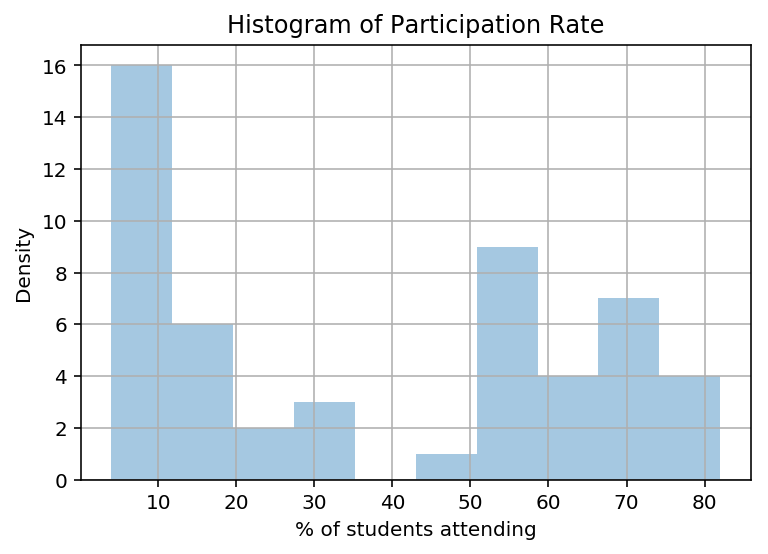

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df2["Rate"], hist=True, bins=10, kde=False)
ax = plt.gca()
ax.grid(True)
ax.set_title("Histogram of Participation Rate")
ax.set_xlabel("% of students attending")
ax.set_ylabel("Density")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


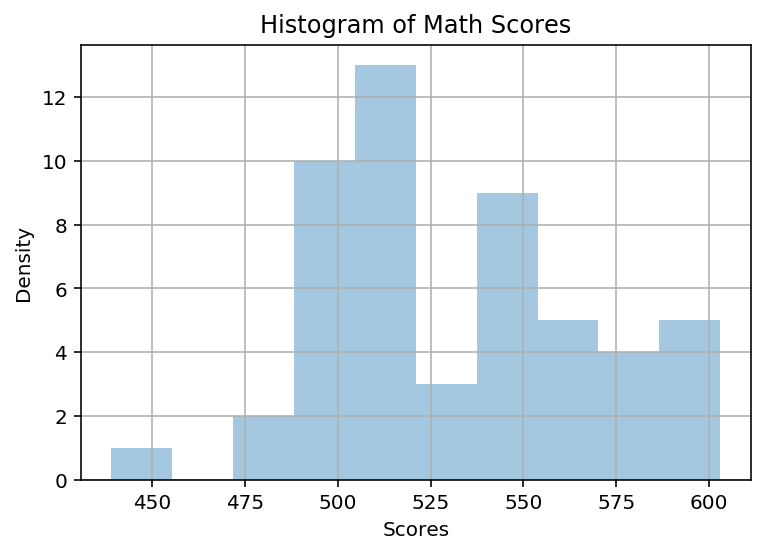

In [9]:
sns.distplot(df2["Math"], hist=True, bins=10, kde=False)
plt.title("Histogram of Math Scores")
plt.xlabel("Scores")
plt.ylabel("Density")
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


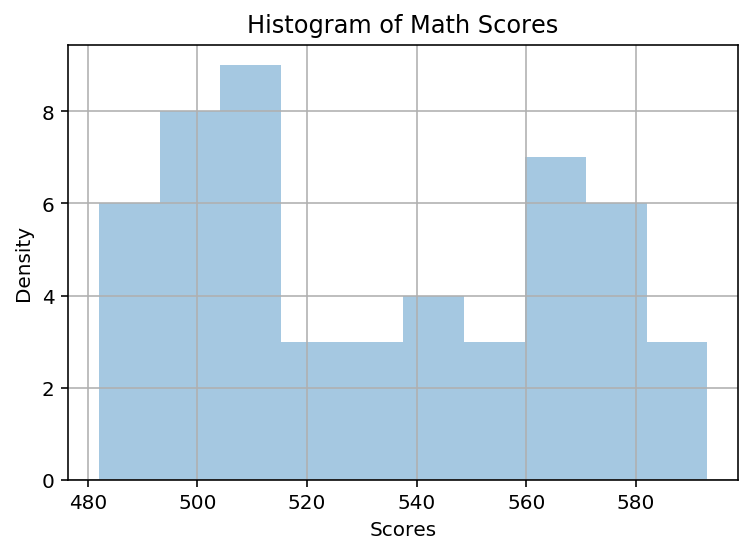

In [10]:
sns.distplot(df2["Verbal"], hist=True, bins=10, kde=False)
plt.title("Histogram of Math Scores")
plt.xlabel("Scores")
plt.ylabel("Density")
plt.grid(True)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

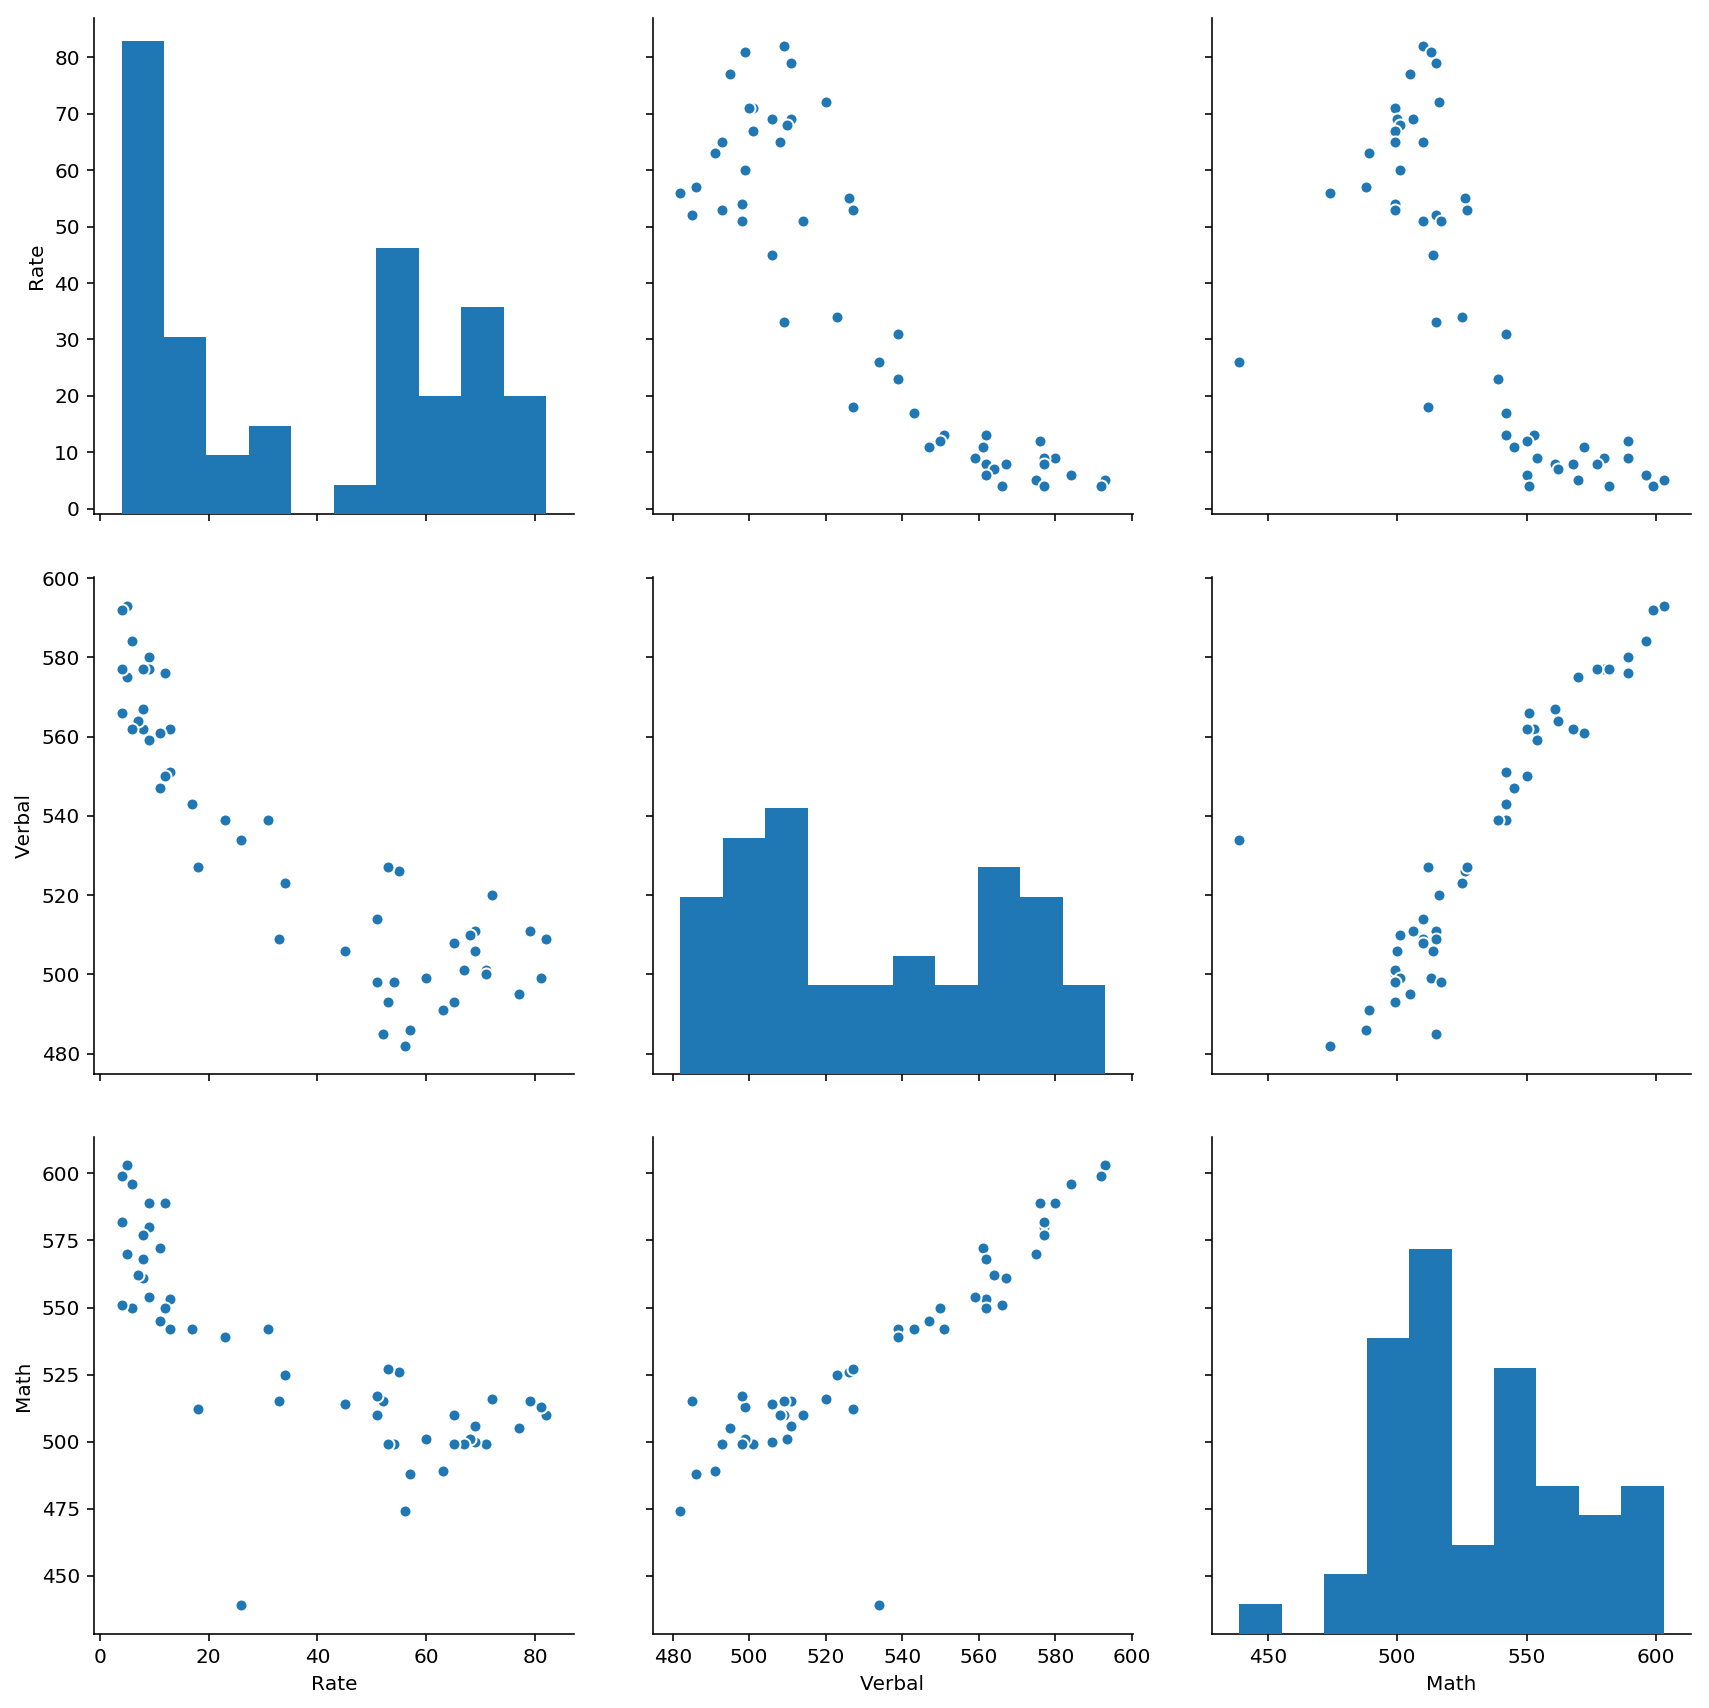

Rate and Verbal are negatively correlated. Rate and Math are negatively correlated.
Math and Verbal are positively correlated.


In [15]:
sns.pairplot(df2, size=4)
plt.tight_layout()
plt.show()
print("Rate and Verbal are negatively correlated.", end=" ")
print("Rate and Math are negatively correlated.")
print("Math and Verbal are positively correlated.")

In [16]:
df2.corr()
# This confirms my explanation about the correlation between Rate, Verbal and Math

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

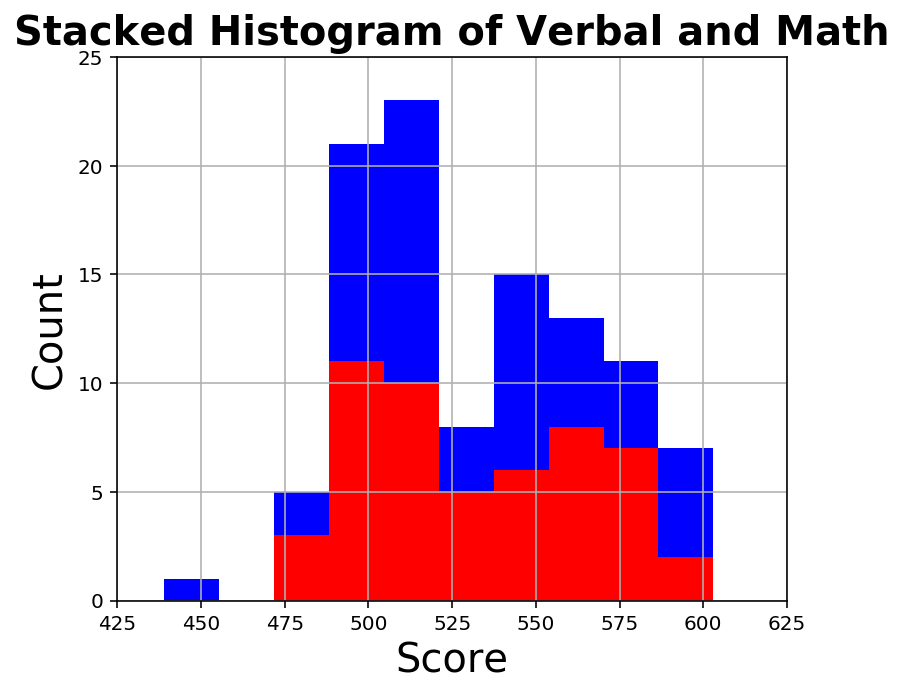

In [17]:
# Setup the figure and axis
fig, ax = plt.subplots(figsize=(6,5))

# Title
ax.set_title("Stacked Histogram of Verbal and Math", fontweight="bold", size=20)
ax.grid(True)

# X and Y Labels + Limits for comparison
ax.set_xlabel("Score", fontsize = 20) # X label
ax.set_ylabel("Count", fontsize = 20) # Y label
ax.set_xlim([425,625])
ax.set_ylim([0,25])

# Plot the histogram
plt.hist([df2["Verbal"], df2["Math"]], color = ["red","blue"], stacked=True, bins=10)
plt.show()

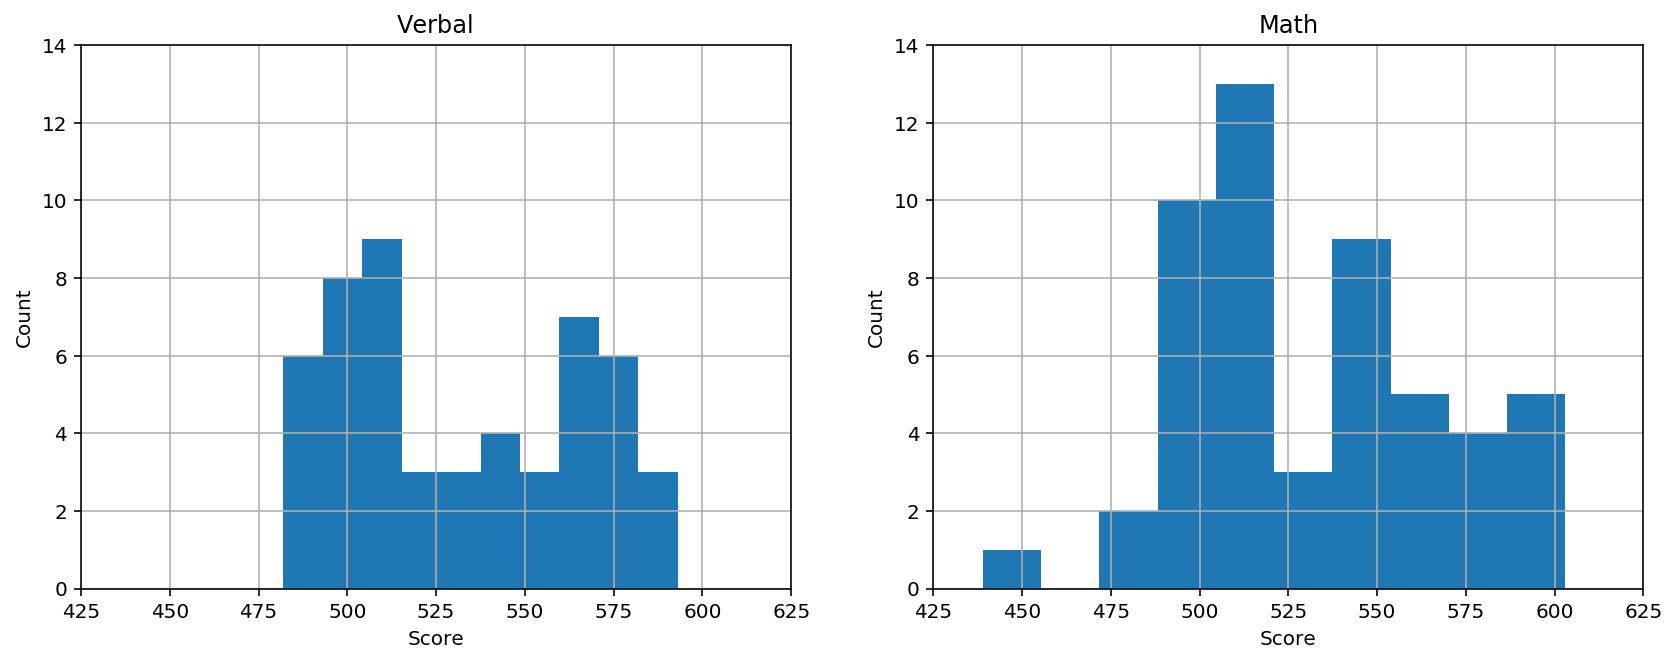

In [18]:
# For checking purposes:
# Set up figure and axes for comparison
fig, ax = plt.subplots(figsize=(14,5))

# Subplot 1: Verbal
plt.subplot(1,2,1, title="Verbal", xlabel="Score", ylabel="Count")
axes = plt.gca()
axes.set_xlim([425,625])
axes.set_ylim([0,14])
df2["Verbal"].hist(bins=10)

# Subplot 2: Math
plt.subplot(1,2,2, title="Math", xlabel="Score", ylabel="Count")
axes = plt.gca()
axes.set_xlim([425,625])
axes.set_ylim([0,14])
df2["Math"].hist(bins=10)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

Q: What are the benefits of using a boxplot as compared to a scatterplot or a histogram?<br>
**A**: The boxplot is able to show the range, minimum and maximum, median, interquartile range values of each column clearly as compared to using scatterplot or histogram.<br>
A scatterplot is good to show the correlation between each variables, whereas a histogram is suitable in displaying the counts and spread of the variables.

Q: What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?<br>
**A**: As the range of 'Rate' is between 0-100, it will result in a downscale in quality of the information displayed.<br>
As it is not on par with the range of the other variables (0-600), the representation to compare is not an accurate description.

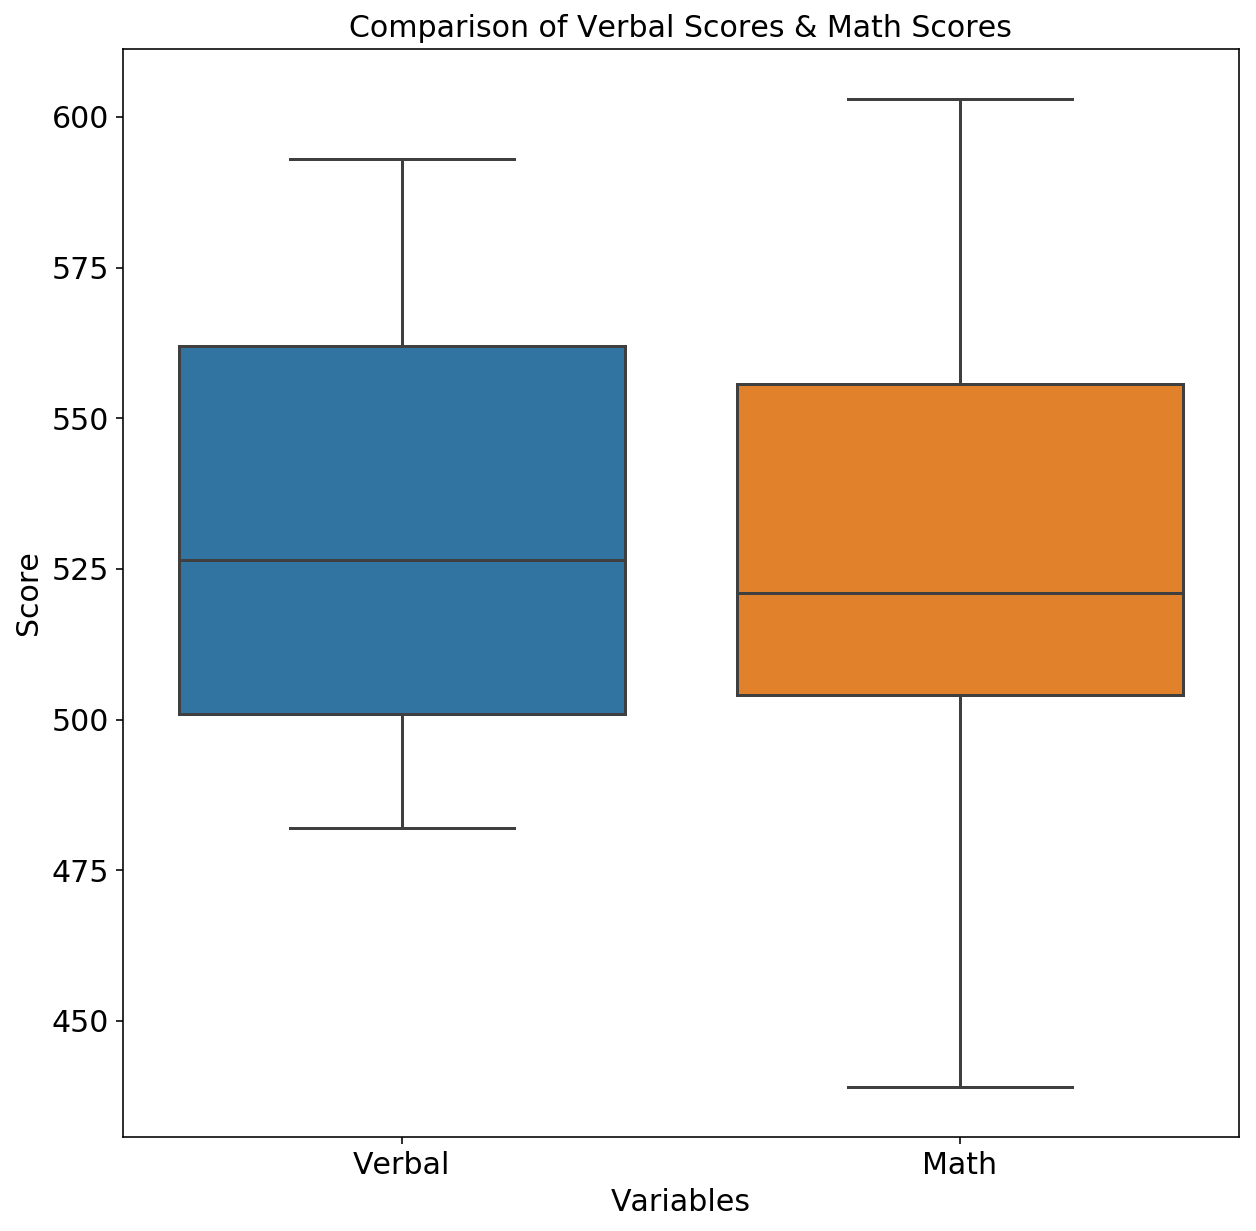

In [19]:
# Box plots of Verbal and Math scores
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Comparison of Verbal Scores & Math Scores", size=15)
ax.set_xlabel("Variables", size=15)
ax.set_ylabel("Score", size=15)
sns.boxplot(data=df2[['Verbal', 'Math']])
plt.tick_params(labelsize=15)
plt.show()

It will lead to a small plot due to the differences in range. As a result, it will not produce a clear plot for comparison.


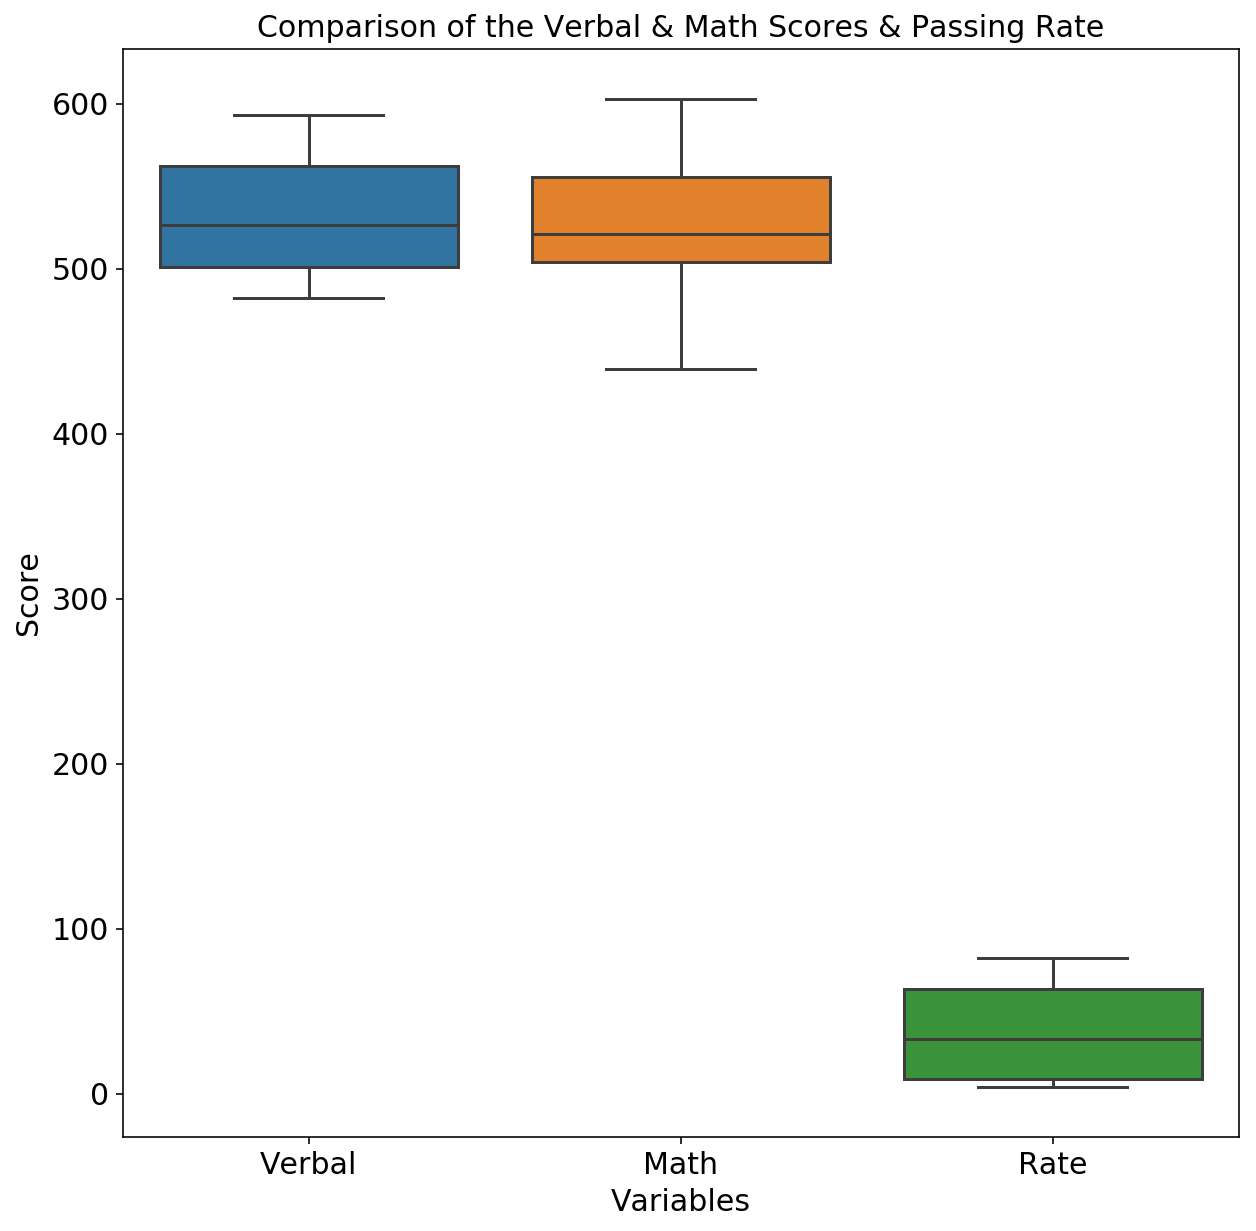

In [20]:
print("It will lead to a small plot due to the differences in range. As a result, it will not produce a clear plot for comparison.")
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Comparison of the Verbal & Math Scores & Passing Rate", size=15)
ax.set_xlabel("Variables", size=15)
ax.set_ylabel("Score", size=15)
sns.boxplot(data=df2[['Verbal', 'Math', 'Rate']])
plt.tick_params(labelsize=15)
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


**A**: My answer is that I will normalize each of the variables for accurate and consistent comparisons.
<br>It allows us to identify if the mean of the population is similar.

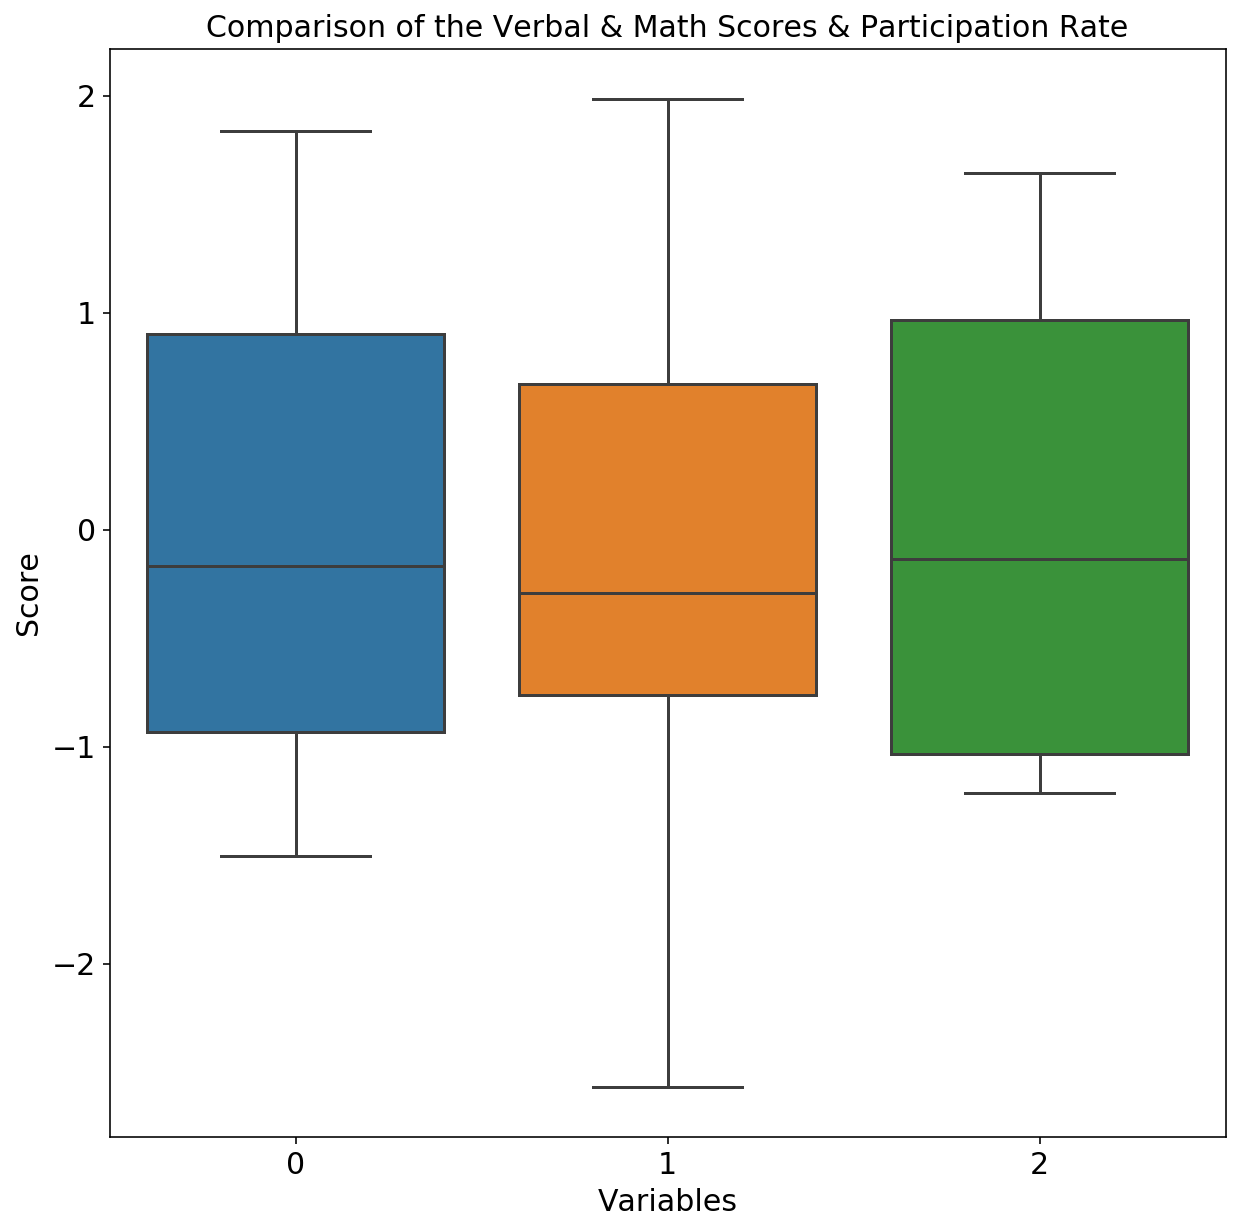

In [21]:
# Normalizing each variables
verbal_normed = (df2["Verbal"]-df2["Verbal"].mean())/df2["Verbal"].std()
math_normed = (df2["Math"]-df2["Math"].mean())/df2["Math"].std()
rate_normed = (df2["Rate"]-df2["Rate"].mean())/df2["Rate"].std()

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Comparison of the Verbal & Math Scores & Participation Rate", size=15)
ax.set_xlabel("Variables", size=15)
ax.set_ylabel("Score", size=15)
sns.boxplot(data=[verbal_normed,math_normed,rate_normed])
plt.tick_params(labelsize=15)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
vb_mean = df2["Verbal"].mean()
vb_median = df2["Verbal"].median()

list_of_states1 = df2[df2["Verbal"] > vb_mean]["State"].values.tolist()
print("List of", len(list_of_states1),"states above the mean:", list_of_states1)
print("The mean is {:.4f}. We can deduce that the distribution is not equally distributed, as there are 28 states below the mean.".format(vb_mean,vb_median))

List of 24 states above the mean: ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
The mean is 532.0192. We can deduce that the distribution is not equally distributed, as there are 28 states below the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
vb_median = df2["Verbal"].median()
list_of_states2 = df2[df2["Verbal"] > vb_median]["State"].values.tolist()
print("List of", len(list_of_states2),"states above the median:", list_of_states2)
print("As mean ({:.4f}) is greater than median ({:.4f}), we can infer that the distribution of Verbal scores is positively skewed, to the right.".format(vb_mean,vb_median))

List of 26 states above the median: ['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
As mean (532.0192) is greater than median (526.5000), we can infer that the distribution of Verbal scores is positively skewed, to the right.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
df2["Difference"] = df2["Verbal"]-df2["Math"]
df2.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
vmml = df2[df2["Verbal"]>df2["Math"]][["State","Difference"]].sort_values(by="Difference", ascending = False).head(10)
mmvl = df2[df2["Math"]>df2["Verbal"]][["State","Difference"]].sort_values(by="Difference", ascending = True).head(10)
print(vmml.head(3))
print(mmvl.head(3))

   State  Difference
27    OH          95
29    WV          15
50    MS          15
   State  Difference
21    HI         -30
23    CA         -19
1     NJ         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


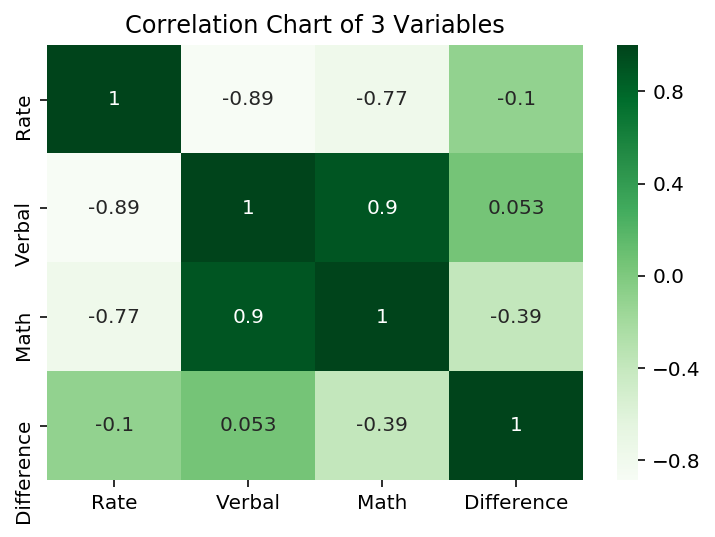

In [26]:
sns.heatmap(df2.corr(), cmap="Greens", annot=True)
plt.title("Correlation Chart of 3 Variables")
df2.corr()

In [27]:
print("1. There is strong negative correlation between Rate and Verbal.")
print("2. There is weaker negative correlation between Rate and Math, as compared to Rate and Verbal.")
print("3. There is strong positive correlation between Math and Verbal.")

1. There is strong negative correlation between Rate and Verbal.
2. There is weaker negative correlation between Rate and Math, as compared to Rate and Verbal.
3. There is strong positive correlation between Math and Verbal.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
df2.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


**count**: The total number of values in the variable column.<br>
**mean**: The average of all values in the same column.<br>
**std**: The standard deviation away from the mean.<br>
**min**: The minimum value of each column.<br>
**25%**: The 1st quartile value at 25%.<br>
**50%**: The 2nd quartile value / median at 50%.<br>
**75%**: The 3rd quartile value at 75%.<br>
**max**: The maximum value of each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
df2.cov()

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


1. Covariance measures the variance between 2 variables, whereas Correlation normalizes the covariance to similar units for comparison.<br>
2. Correlation of two variables is obtained by diving the Covariance of two variables over the square root of the product of the variance of both variables.<br>
3. Correlation is a pure measure of association, whereas covariance is measured in the units of two variables multipled. In our case, the unit of (score X score) does not have any useful meaning.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
# importing seaborn for plotting
import seaborn as sns

drug_file = 'drug-use-by-age.csv'
drug_df = pd.read_csv(drug_file)
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [31]:
drug_df.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
drug_df.info()
# age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency
# are not in float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [33]:
nonfloatlist = ["cocaine-frequency", "crack-frequency", "heroin-frequency", "inhalant-frequency", "oxycontin-frequency", "meth-frequency"]

# replacing values with '-' to '0.0' to achieve float64
drug_df[nonfloatlist] = drug_df[nonfloatlist].applymap(lambda x: float(x.replace("-", "0.0")))
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [34]:
print("Correlation between respective drug usage and its frequency")
print("="*60)
for i in range(1, len(drug_df.columns)//2):
    if (drug_df[drug_df.columns[i*2:(i+1)*2]].corr().values[1][0] > 0):
        print(drug_df.columns[i*2], "vs", drug_df.columns[i*2+1], ":", drug_df[drug_df.columns[i*2:(i+1)*2]].corr().values[1][0], "    - (+) Positive Correlation")
    else:
        print(drug_df.columns[i*2], "vs", drug_df.columns[i*2+1], ":", drug_df[drug_df.columns[i*2:(i+1)*2]].corr().values[1][0], "    - (-) Negative Correlation")

Correlation between respective drug usage and its frequency
alcohol-use vs alcohol-frequency : 0.8978892938239401     - (+) Positive Correlation
marijuana-use vs marijuana-frequency : 0.6156102019478248     - (+) Positive Correlation
cocaine-use vs cocaine-frequency : -0.07784815495891297     - (-) Negative Correlation
crack-use vs crack-frequency : 0.3334402854421076     - (+) Positive Correlation
heroin-use vs heroin-frequency : -0.04423949325806981     - (-) Negative Correlation
hallucinogen-use vs hallucinogen-frequency : -0.42786265287156117     - (-) Negative Correlation
inhalant-use vs inhalant-frequency : 0.036979407825951945     - (+) Positive Correlation
pain-releiver-use vs pain-releiver-frequency : -0.46861747477663     - (-) Negative Correlation
oxycontin-use vs oxycontin-frequency : -0.14387708969816887     - (-) Negative Correlation
tranquilizer-use vs tranquilizer-frequency : -0.38895384779316783     - (-) Negative Correlation
stimulant-use vs stimulant-frequency : -0.3

In [35]:
drug_df.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.388318,0.281797,0.574629,0.007798,...,-0.166039,0.021226,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.510735,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocaine-frequency,0.388318,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crack-frequency,0.574629,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708


In [36]:
print("Correlation between respective drug usage/drug usage & frequency/frequency")
print("="*60)
for i in range(2, len(drug_df.columns)-2):
    if (drug_df[drug_df.columns[i:i+3]].corr().values[2][0] > 0):
        print(drug_df.columns[i], "vs", drug_df.columns[i+2], ":", drug_df[drug_df.columns[i:i+3]].corr().values[2][0], "    - (+) Positive Correlation")
    else:
        print(drug_df.columns[i], "vs", drug_df.columns[i+2], ":", drug_df[drug_df.columns[i:i+3]].corr().values[2][0], "    - (-) Negative Correlation")

Correlation between respective drug usage/drug usage & frequency/frequency
alcohol-use vs marijuana-use : 0.5941650600365183     - (+) Positive Correlation
alcohol-frequency vs marijuana-frequency : 0.8187685027986856     - (+) Positive Correlation
marijuana-use vs cocaine-use : 0.8837886126108127     - (+) Positive Correlation
marijuana-frequency vs cocaine-frequency : 0.26519293106120656     - (+) Positive Correlation
cocaine-use vs crack-use : 0.8357267652905687     - (+) Positive Correlation
cocaine-frequency vs crack-frequency : 0.8722599764116105     - (+) Positive Correlation
crack-use vs heroin-use : 0.7507903240416459     - (+) Positive Correlation
crack-frequency vs heroin-frequency : 0.33581487923584513     - (+) Positive Correlation
heroin-use vs hallucinogen-use : 0.6836736498353275     - (+) Positive Correlation
heroin-frequency vs hallucinogen-frequency : -0.18808470353771992     - (-) Negative Correlation
hallucinogen-use vs inhalant-use : 0.173030133984069     - (+) Po

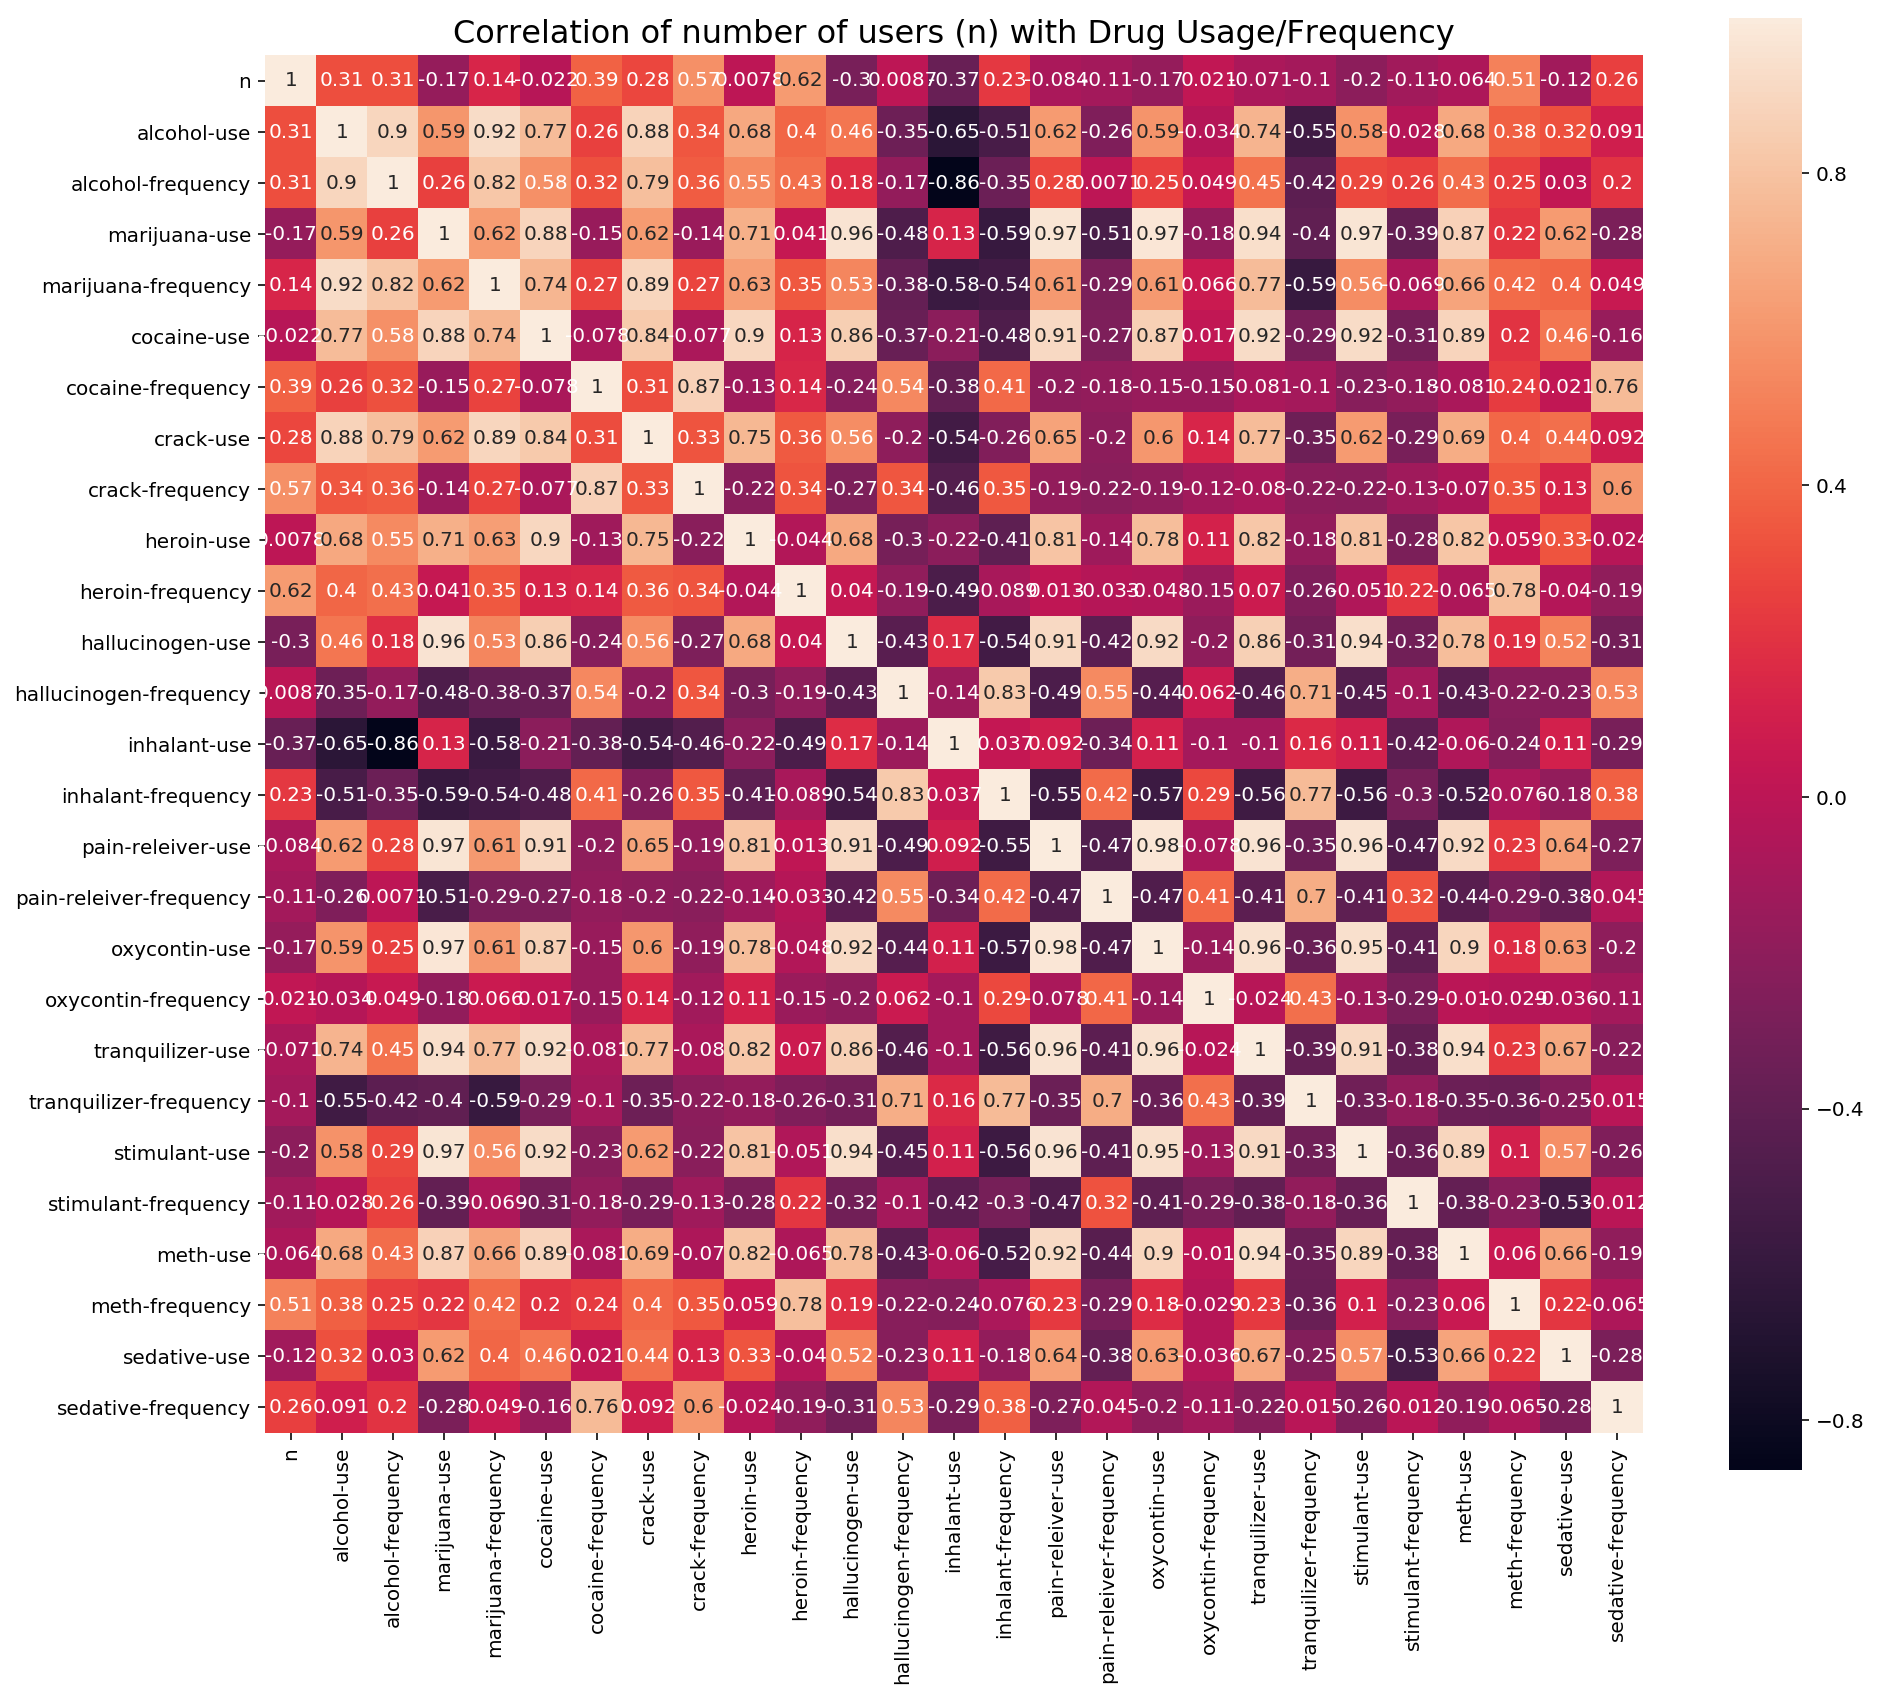

In [38]:
fig, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of number of users (n) with Drug Usage/Frequency',y=1,size=16)
sns.heatmap(drug_df.corr(), square = True, vmax=1, annot=True)
plt.tight_layout()
plt.show()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### Answer
**Basic Definitions:**
<br>> `Hallucinogen` - a psychoactive agent which can cause hallucinations, perceptual anomalies, and other changes in thoughts, emotion, and consciousness.
<br>> `Alochol` - a psychoactive substance that can produces various effects not excluding euphoria, decreased anxiety, sedation, impairment of cognitive, memory, motor, and sensory function, and generalized depression of central nervous system function.

`alcohol-use` - Percentage of those in an age group who used alcohol in the past 12 months
<br>`hallucinogen-use` - Percentage of those in an age group who used hallucinogens in the past 12 months

**H0**: Alcohol usage and Hallucinogen usage are independent of one another.
<br>**H1**: Alcohol usage and Hallucinogen usage are not independent of one another.

**Reason for conducting this test**
My guess is that people who use `alcohol` will not be using `hallucinogen`, as they produce similar effects such as cognitive impairment and changes in emotions. I am also guessing that more people will use `alcohol` as it is more commonly available in lifestyle products as compared to `hallucinogens`.

In this test, I will be comparing between the correlation of the number of users using these two substances.

In [39]:
drug_df["alcohol-count"] = drug_df["alcohol-use"] * drug_df["n"]
drug_df["hallucinogen-count"] = drug_df["hallucinogen-use"] * drug_df["n"]

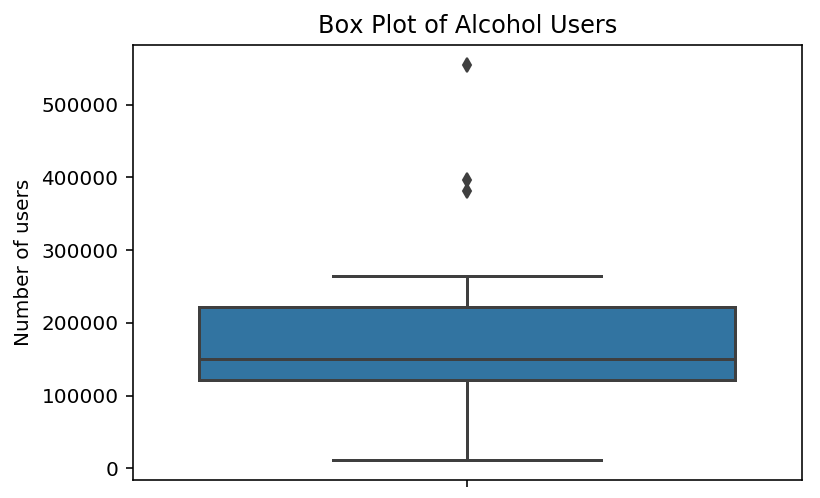

In [40]:
sns.boxplot("alcohol-count", data=drug_df, orient='v')
ax = plt.gca()
ax.set_title("Box Plot of Alcohol Users")
ax.set_ylabel("Number of users")
plt.show()

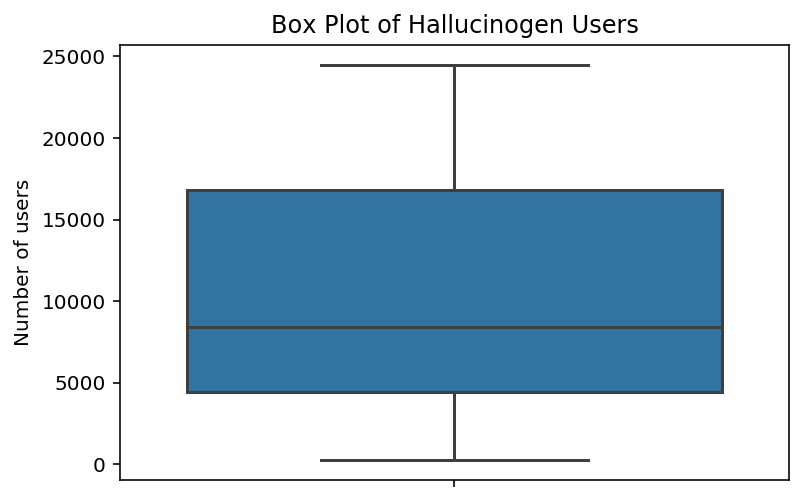

In [41]:
sns.boxplot("hallucinogen-count", data=drug_df, orient='v')
ax = plt.gca()
ax.set_title("Box Plot of Hallucinogen Users")
ax.set_ylabel("Number of users")
plt.show()

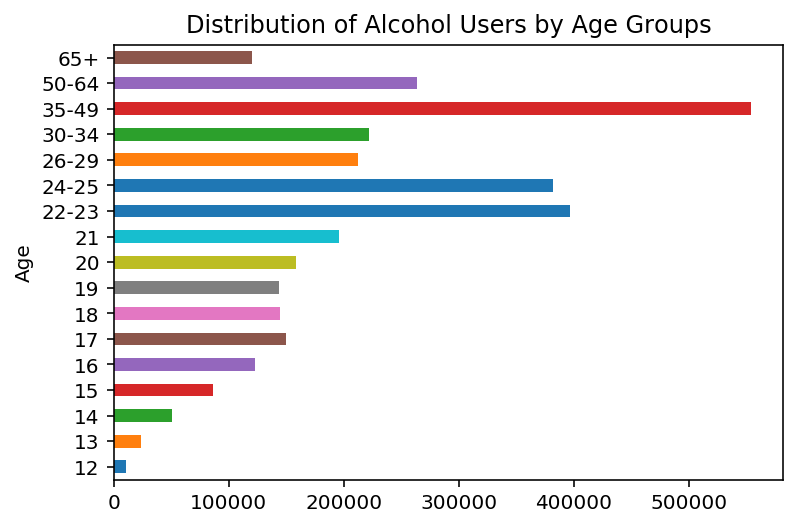

In [42]:
age_col = drug_df["age"].values.tolist()
drug_df["alcohol-count"].plot(kind="barh")
plt.title("Distribution of Alcohol Users by Age Groups")
plt.ylabel("Age")
plt.yticks(range(0,17),age_col)
plt.show()

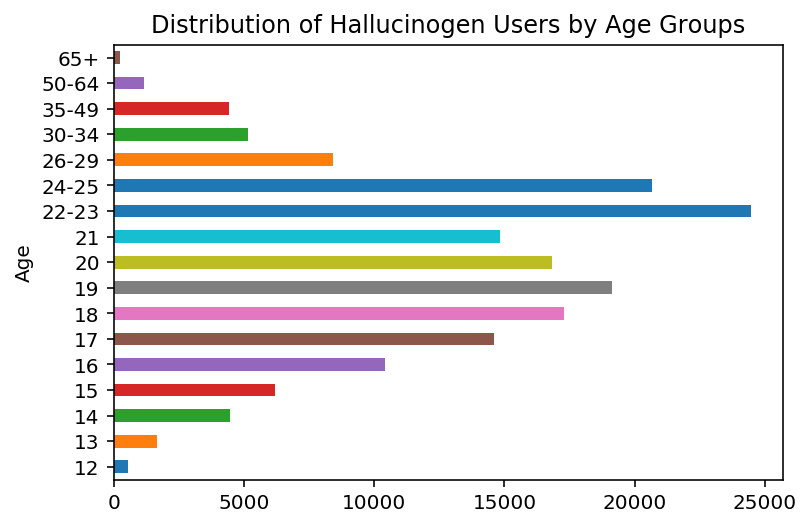

In [43]:
drug_df["hallucinogen-count"].plot(kind="barh")
plt.title("Distribution of Hallucinogen Users by Age Groups")
plt.ylabel("Age")
plt.yticks(range(0,17),age_col)
plt.show()

**Report**



...

In [44]:
# Code
corr, p = stats.pearsonr(drug_df[["alcohol-count"]],drug_df[["hallucinogen-count"]])
print("Pearson Correlation: {:.4f}, p-value: {:.4f}".format(corr[0],p[0]))

Pearson Correlation: 0.3317, p-value: 0.1933


As the correlation between the number of people using `Alcohol` and `Hallucinogen` is only 0.3317 and the p-value is only 0.1933, I am therefore __unable__ to reject the null hypothesis (H0). As such, `alcohol` users and `hallucinogen` users are highly likely to be independent of one another, although both numbers do show a weak positive correlation.

In [45]:
# Code
drug_df[["alcohol-count","hallucinogen-count"]].corr()

,alcohol-count,hallucinogen-count
alcohol-count,1.00000,0.33172
hallucinogen-count,0.33172,1.00000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


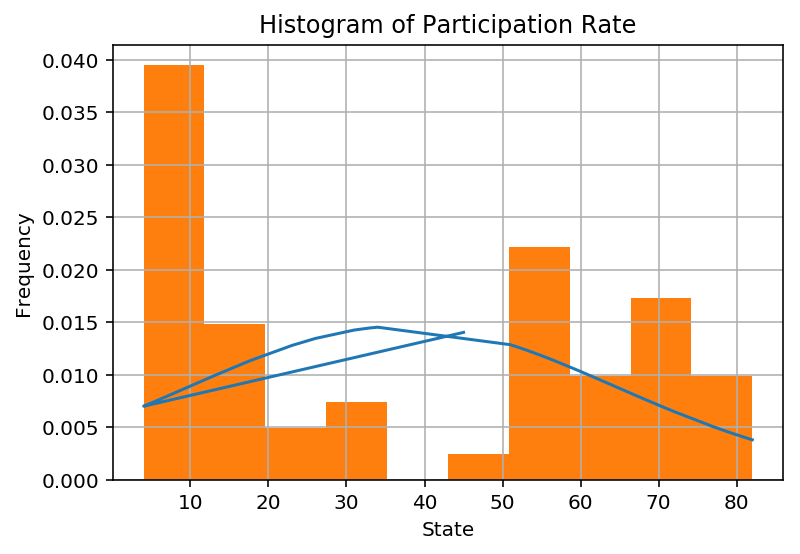

In [46]:
### Not complete. Kindly ignore this section. ###

from scipy.stats import norm

sat_file = 'sat_scores.csv'
sat_score = pd.read_csv(sat_file)
ratestd = sat_score["Rate"].std()
ratemean = sat_score["Rate"].mean()

q75, q25 = np.percentile(sat_score["Rate"], [75 ,25])
iqr = q75 - q25

plt.plot(sat_score["Rate"], norm.pdf(sat_score["Rate"], ratemean, ratestd))
sat_score["Rate"].hist(bins=10, normed=True)
plt.title("Histogram of Participation Rate")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [47]:
import scipy.stats as stats

# Pearson Correlation
corr, p = stats.pearsonr(sat_score[["Verbal"]], sat_score[["Math"]])
print("Pearson Correlation: {:.4f}, p-value: {:.4f}".format(corr[0], p[0]))

# Spearman Correlation
corr, p = stats.spearmanr(sat_score[["Verbal"]], sat_score[["Math"]])
print("Spearman Correlation: {:.4f}, p-value: {:.4f}".format(corr, p))

Pearson Correlation: 0.8999, p-value: 0.0000
Spearman Correlation: 0.9052, p-value: 0.0000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


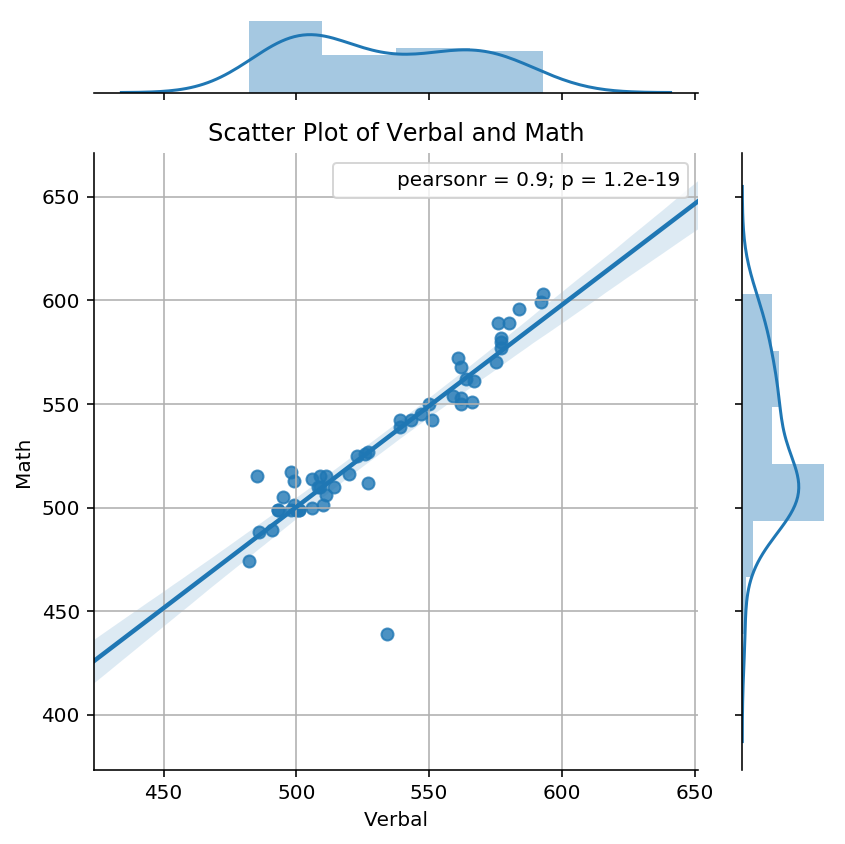

In [48]:
sns.jointplot("Verbal","Math",data=sat_score,kind="reg")
ax=plt.gca()
ax.set_title("Scatter Plot of Verbal and Math")
ax.grid(True)
plt.tight_layout()
plt.show()

`Pearsons correlation` is calculated through the distance between the points and the best fit line drawn.<br>
`Spearman correlation` is calculated by ordering each columns of values based on a basic numeric rank and then using the sum of squared difference between the two ranks and the spearman formula.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [49]:
np.percentile(sat_score["Rate"], 56.730769)

51.0

In [50]:
for i, each in enumerate(sat_score["Rate"]):
    sat_score.loc[i,"RatePct"] = stats.percentileofscore(sat_score["Rate"], each)
sat_score["RatePct"]

0     100.000000
1      98.076923
2      96.153846
3      94.230769
4      92.307692
5      89.423077
6      89.423077
7      85.576923
8      85.576923
9      82.692308
10     80.769231
11     77.884615
12     77.884615
13     75.000000
14     73.076923
15     71.153846
16     69.230769
17     67.307692
18     65.384615
19     62.500000
20     62.500000
21     59.615385
22     56.730769
23     56.730769
24     51.923077
25     50.000000
26     48.076923
27     46.153846
28     44.230769
29     42.307692
30     40.384615
31     37.500000
32     37.500000
33     33.653846
34     33.653846
35     29.807692
36     29.807692
37     25.000000
38     25.000000
39     25.000000
40     19.230769
41     19.230769
42     19.230769
43     15.384615
44     12.500000
45     12.500000
46      8.653846
47      8.653846
48      3.846154
49      3.846154
50      3.846154
51     53.846154
Name: RatePct, dtype: float64

In [51]:
sat_score[sat_score["State"] == "CA"]["RatePct"]

23    56.730769
Name: RatePct, dtype: float64

**Answer**: `Percentile` ranks the highest value as 100, lowest as 0 and anything in between according to their respective values. This is similar to `Spearman rank correlation`, which also ranks the values according to the range (ie. Rate (82) ranked as highest, Rate (4) ranked lowest).

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

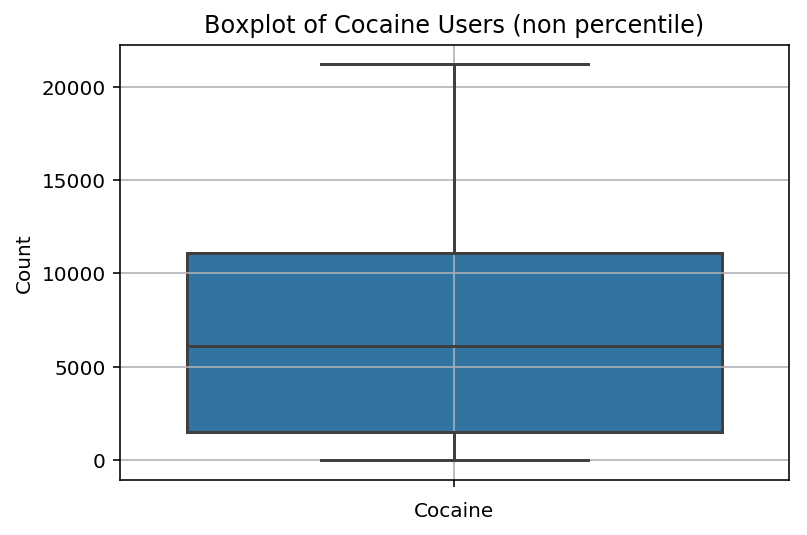

In [52]:
drug_df["cocaine-count"] = drug_df["cocaine-use"] * drug_df["n"]
sns.boxplot(drug_df["cocaine-count"], orient='v')
ax=plt.gca()
ax.set_title("Boxplot of Cocaine Users (non percentile)")
ax.set_xlabel("Cocaine")
ax.set_ylabel("Count")
ax.grid(True)
plt.show()

In [53]:
for i, each in enumerate(drug_df["cocaine-count"]):
    drug_df.loc[i,"cocaine-count-pct"] = stats.percentileofscore(drug_df["cocaine-count"], each)

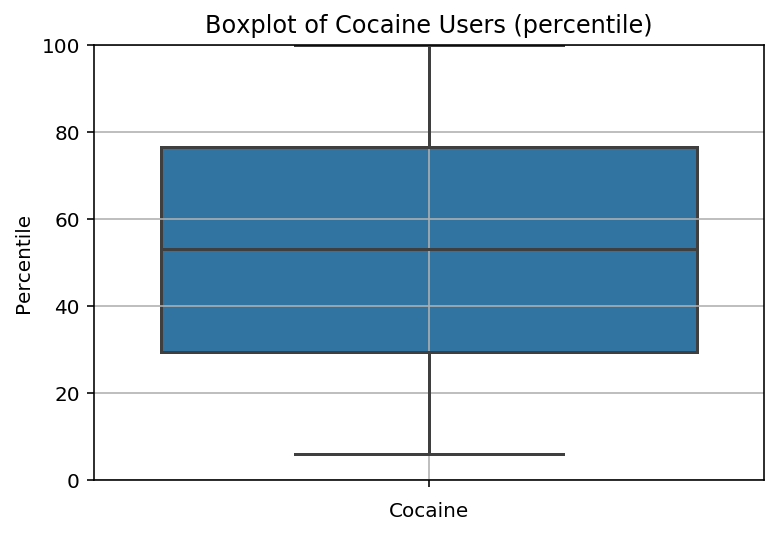

In [55]:
sns.boxplot(drug_df["cocaine-count-pct"],orient='v')
ax=plt.gca()
ax.set_title("Boxplot of Cocaine Users (percentile)")
ax.set_xlabel("Cocaine")
ax.set_ylabel("Percentile")
ax.set_ylim(0,100)
ax.grid(True)
plt.show()